# Задача 6

**Подключаем необходимые библиотеки. Seaborn -- аналог matplotlib, но строит более красивые гистограммы**

In [1]:
import numpy as np
import scipy.stats
import seaborn as sns

**Далее вводим наши данные**

In [2]:
alpha = 0.01

In [3]:
n_i = np.array([10, 23, 60, 170, 195, 179, 61, 22, 13])
data = np.concatenate((np.array([1] * 10),
                       np.array([3] * 23),
                       np.array([5] * 60),
                       np.array([7] * 170),
                       np.array([9] * 195),
                       np.array([11] * 179),
                       np.array([13] * 61),
                       np.array([15] * 22),
                       np.array([17] * 13)))
n = len(data)

In [4]:
print('Диапазон | Число наблюдений')
for i in range(9):
    print('{:>3} - {:>2}'.format(i * 2, (i + 1) * 2), '|', n_i[i])

Диапазон | Число наблюдений
  0 -  2 | 10
  2 -  4 | 23
  4 -  6 | 60
  6 -  8 | 170
  8 - 10 | 195
 10 - 12 | 179
 12 - 14 | 61
 14 - 16 | 22
 16 - 18 | 13


**Строим гистограмму**

<AxesSubplot:ylabel='Count'>

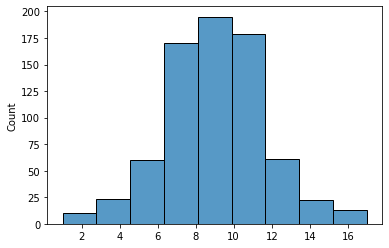

In [5]:
sns.histplot(data, bins=9)

**Находим точечные оценки математического ожидания (avg) и дисперсии (std\*\*2). Коэффициент $\frac{n}{n - 1}$ введён, чтобы исправить неточность формулы, используемой библиотекой numpy**

In [6]:
avg = np.mean(data)
std = np.std(data) * (n / (n - 1)) ** 0.5
avg, std**2

(9.054570259208731, 8.772974302775479)

**Строим теоретическую кривую нормального распределения с заданными значениями математического ожидания и дисперсии**

c:\Users\Delta_C\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

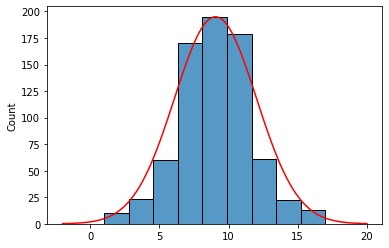

In [8]:
X = np.linspace(-2, 20, 100)
norm_dist = scipy.stats.norm.pdf(X, avg, std)

sns.histplot(data, bins=9)
sns.lineplot(X, norm_dist * 195 * (2 * np.pi) ** 0.5 * std, color='red')

**Вычисляем теоретические вероятности. Для проверки выводим сумму вероятностей**

In [10]:
th_prob = []
for i in range(0, 17, 2):
    if i == 0:
        th_prob.append(scipy.stats.norm.cdf(2, avg, std))
    elif i == 16:
        th_prob.append(1 - scipy.stats.norm.cdf(16, avg, std))
    else:
        th_prob.append(scipy.stats.norm.cdf(i + 2, avg, std) - scipy.stats.norm.cdf(i, avg, std))

th_prob = np.array(th_prob)
np.sum(th_prob)

0.9999999999999999

**Вычисляем теоретические частоты и значение $\chi ^ 2$**

In [11]:
th_freq = th_prob * n
chi_squared = np.sum((n_i - th_freq) ** 2 / th_freq)

chi_squared

23.590023001623933

**Находим значение 1% квантиля распределения $\chi ^ 2$ с 6-ю степенями свободы и сравниваем полученные числа**

In [12]:
th_chi_squared = scipy.stats.chi2.ppf(1 - alpha, 6)
th_chi_squared

16.811893829770927

In [13]:
chi_squared < th_chi_squared

False

**Как видим, значение $\chi^2$ оказалось выше критического, значит, гипотезу следует отвергнуть**